<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Visual 1 : Median Value of Owner Occupied Homes**

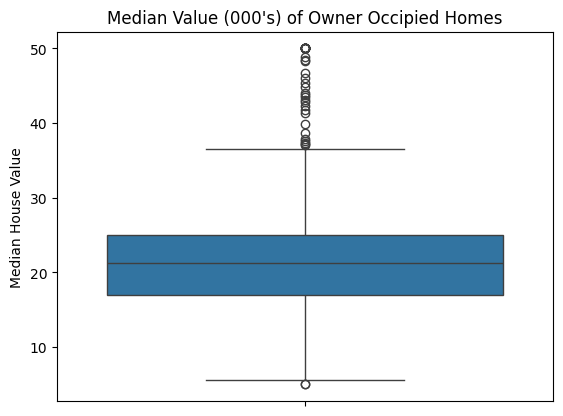

In [74]:
sns.boxplot(data=boston_df,y="MEDV").set(title="Median Value (0000's) of Owner Occipied Homes",ylabel="Median House Value")
pyplot.show()

Median Value for owner occupied homes are around 21 - 22. The lowest value is around 5 and highest around 36. it also has a number of outliers above the maximum.

#### Visual 2 : Box Plot for Charles River variable ####

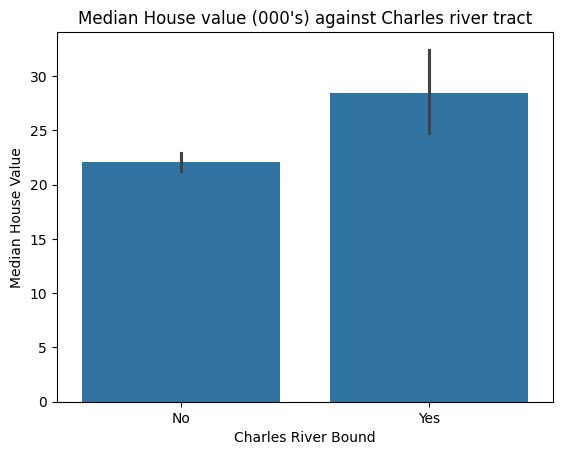

In [76]:
boston_df.loc[(boston_df['CHAS'] == 0.0),"rv_bound"] = "No"
boston_df.loc[(boston_df['CHAS'] == 1.0),"rv_bound"] = "Yes"

sns.barplot(data=boston_df, x="rv_bound", y="MEDV").set(title = "Median House value (000's) against Charles river tract",xlabel="Charles River Bound",ylabel="Median House Value")

pyplot.show()

There is a difference in median value of homes against the Charles river tract bound. The median price for homes are 27 in Charles river tract bound against 22 when it is not.

The median home value for homes that are Charles river tract bound has higher standard deviation than the home that are not river bound.

#### Visual 3 : Boxplot for the MEDV variable vs the AGE variable ####

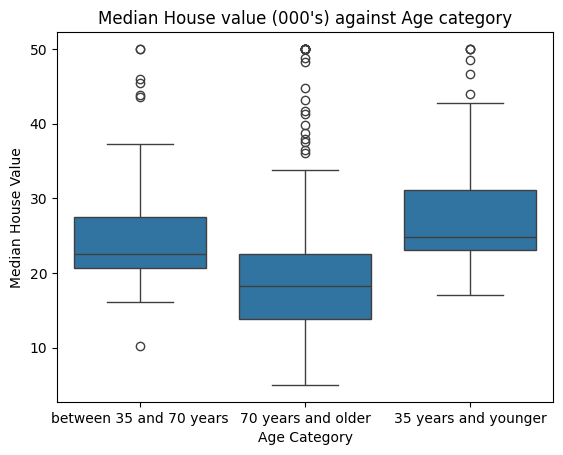

In [79]:
boston_df.loc[(boston_df['AGE'] <= 35.0),"age_category"] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] >35.0) & (boston_df['CHAS'] <70.0),"age_category"] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70.0),"age_category"] = "70 years and older"

lower_cat_median_house_value = boston_df[boston_df['age_category'] == '35 years and younger']['MEDV']
mid_cat_median_house_value =   boston_df[boston_df['age_category'] == 'between 35 and 70 years']['MEDV']
upper_cat_median_house_value =   boston_df[boston_df['age_category'] == '70 years and older']['MEDV']

sns.boxplot(data=boston_df,x="age_category",y="MEDV").set(title="Median House value (000's) against Age category",xlabel="Age Category",ylabel="Median House Value")
pyplot.show()

There is a difference in median among mutiple age groups for the median hoouse value. The median is decreasing as the age group increases from young to old.

#### Visual 4 : Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town ####

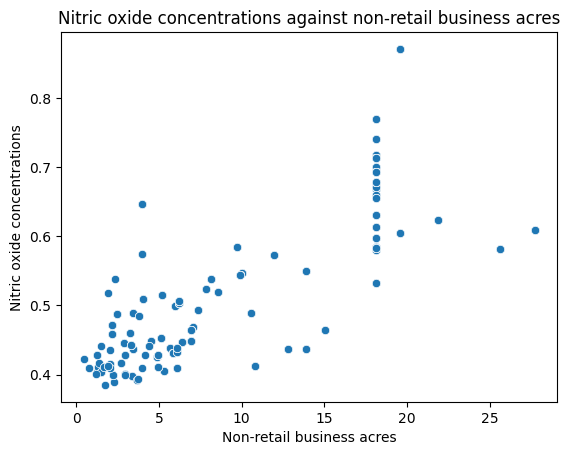

In [82]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(title="Nitric oxide concentrations against non-retail business acres",xlabel="Non-retail business acres",ylabel="Nitric oxide concentrations")
pyplot.show()

The concentration is more at lower end of non-retail business acers and there is a linear relationship between the vairables

#### Visual 5 : Histogram for the pupil to teacher ratio variable ####

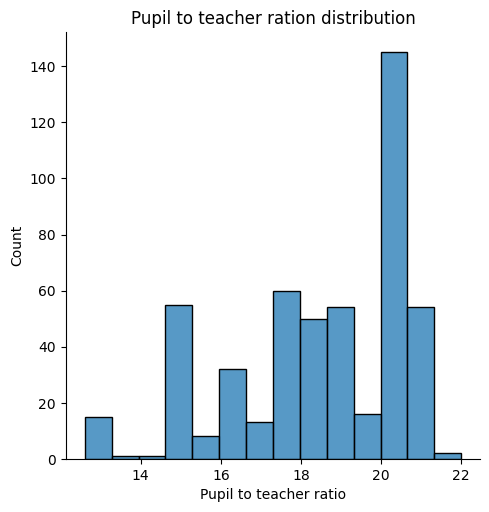

In [92]:
sns.displot(boston_df['PTRATIO']).set(title="Pupil to teacher ration distribution",xlabel="Pupil to teacher ratio")
pyplot.show()

The distribution is skewed towards right as more pupil to teacher ratio around 20.5 seems to have highest number of occurances in the data

#### Question 1 : Is there a significant difference in the median value of houses bounded by the Charles river or not?

*   $H\_0:$ There is no significant difference in median value of houses bounded by the Charles river
*   $H\_1:$ There is a significant difference in median value of houses bounded by the Charles river 

In [ ]:
boston_df.loc[(boston_df['CHAS'] == 0.0),"rv_bound"] = "No"
boston_df.loc[(boston_df['CHAS'] == 1.0),"rv_bound"] = "Yes"

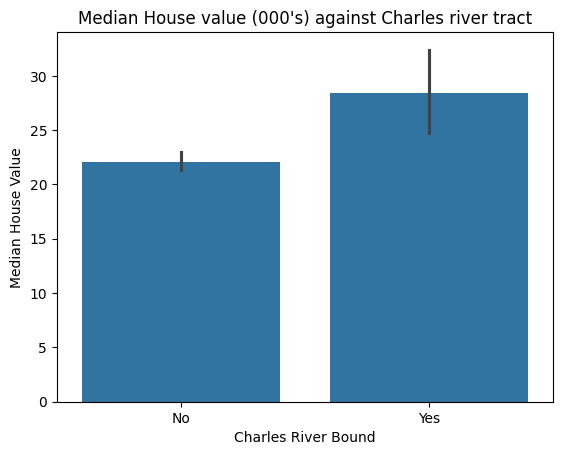

In [50]:
sns.barplot(data=boston_df, x="rv_bound", y="MEDV").set(title = "Median House value (000's) against Charles river tract",xlabel="Charles River Bound",ylabel="Median House Value")

pyplot.show()

In [17]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],boston_df[boston_df['CHAS'] == 1.0]['MEDV'],center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

As pvalue is < 0.05 , we consider the variance as not equal

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion :** As p-value is less than alpha value 0.05 we reject the null hypothesis as there is significant difference in median value of houses bounded by Charles river.

#### Question 2 : Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

*   $H\_0:$ There is no difference in median value of houses of proportion of owner-occupied units built before 1940
*   $H\_1:$ There is difference in median value of houses of proportion of owner-occupied units built before 1940

The age grouping can be divided into categories "35 years and younger" , "between 35 and 70 years" , "70 years and older"
The mean variance among these age categories can be checked with one-way ANOVA

    The hypothesis can be written as
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [63]:
boston_df.loc[(boston_df['AGE'] <= 35.0),"age_category"] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] >35.0) & (boston_df['CHAS'] <70.0),"age_category"] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70.0),"age_category"] = "70 years and older"

lower_cat_median_house_value = boston_df[boston_df['age_category'] == '35 years and younger']['MEDV']
mid_cat_median_house_value =   boston_df[boston_df['age_category'] == 'between 35 and 70 years']['MEDV']
upper_cat_median_house_value =   boston_df[boston_df['age_category'] == '70 years and older']['MEDV']


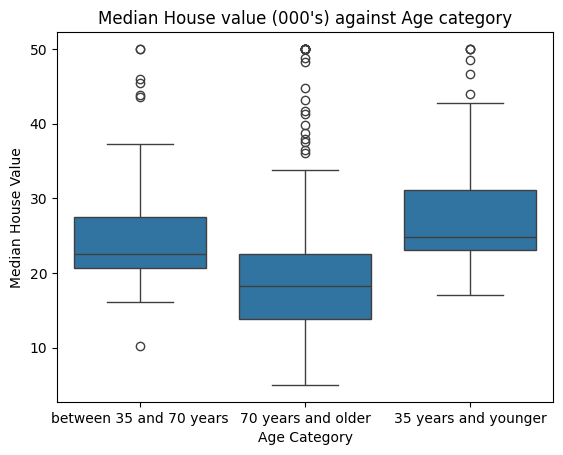

In [64]:
sns.boxplot(data=boston_df,x="age_category",y="MEDV").set(title="Median House value (000's) against Age category",xlabel="Age Category",ylabel="Median House Value")
pyplot.show()

In [66]:
f_statistic, p_value = scipy.stats.f_oneway(lower_cat_median_house_value, mid_cat_median_house_value, upper_cat_median_house_value)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

**There are differences in median values of houses of each proportion of owner-occupied units built before 1940**

#### Question 3 : Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
*   $H\_1:$ There is strong relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

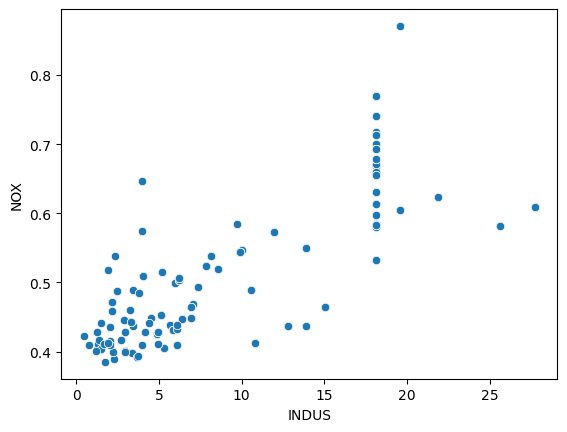

In [70]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.show()

The graph shows a linear relationship between the non-retial business acres and Nitric oxide concentration

In [72]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

#### Question 4 : What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? ####

*   $H\_0:$ There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes
*   $H\_1:$ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes

In [94]:
X = boston_df['DIS']

y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        18:22:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :** p-value is < 0.05, thus reject the null hypothesis. There is a an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes

R-Squared = 0.062 , R = 0.248 and coefficient = 1.09, showing a postive correlation between additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes